<a href="https://colab.research.google.com/github/tbhavsar1/IBM_DataScience_Certification/blob/master/Course7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
'''
Course 7 - Assignment
Lab for Final Project - Data Analytics for House Pricing Data Set
'''

'\nCourse 7 - Assignment\nLab for Final Project - Data Analytics for House Pricing Data Set\n'

In [60]:
#---------------------------
#Import Required Libraries
#---------------------------

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [61]:
#---------------------------
#Import Data-Set
#---------------------------

file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
data=pd.read_csv(file_name)


In [62]:
print(f"data.head():\n{data.head()}")

data.head():
   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0    

In [63]:
'''
Display the data types of each column using the attribute dtypes, then take a screenshot and submit it.
Include your code in the image.
'''

print(f"data.dtypes:\n{data.dtypes}")


data.dtypes:
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [64]:
#-------------------------------------------------
#obtain a statistical summary of the data frame
#-------------------------------------------------

print(f"data.describe():\n{data.describe()}")


data.describe():
        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.53

In [65]:
'''
Question 2

Data Wrangling -  Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe()
to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True
'''

data.drop("id", axis = 1, inplace = True)
data.drop("Unnamed: 0", axis = 1, inplace = True)

print(f"data.describe():\n{data.describe()}")


data.describe():
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517 

In [66]:
#--------------------------------------------------------------------
#Identify missing values for the columns bedrooms and bathrooms
#--------------------------------------------------------------------

print("number of NaN values for the column bedrooms :", data['bedrooms'].isnull().sum())

print("number of NaN values for the column bathrooms :", data['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [67]:
'''
Replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms' using the method replace().
useing inplace parameter to True
'''

mean=data['bedrooms'].mean()
data.replace({'bedrooms': {np.nan: mean}}, inplace=True)


In [68]:
'''
Replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms' using the method replace().
using - inplace parameter top True
'''

mean=data['bathrooms'].mean()
data.replace({'bathrooms': {np.nan: mean}}, inplace=True)

In [69]:
#check for NaN

print("number of NaN values for the column bedrooms :", data['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", data['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [70]:
'''
Perform EDA- Exploratory Data Analysis
#Question 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.
'''
data['floors'].value_counts().to_frame()


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

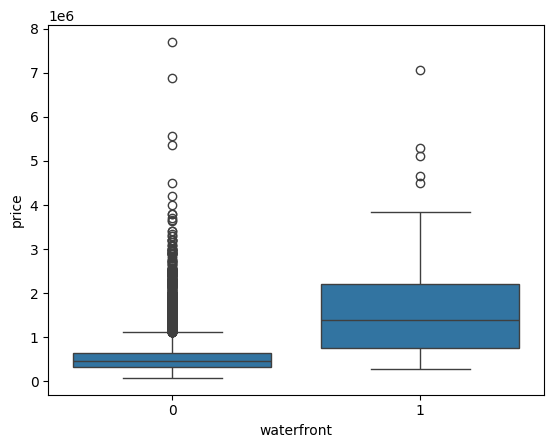

In [71]:
'''
Question 4
Use the function boxplot in the seaborn library to determine whether houses
with a waterfront view or without a waterfront view have more price outliers.
'''

sns.boxplot(x="waterfront",y="price",data=data)


<function seaborn.regression.regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)>

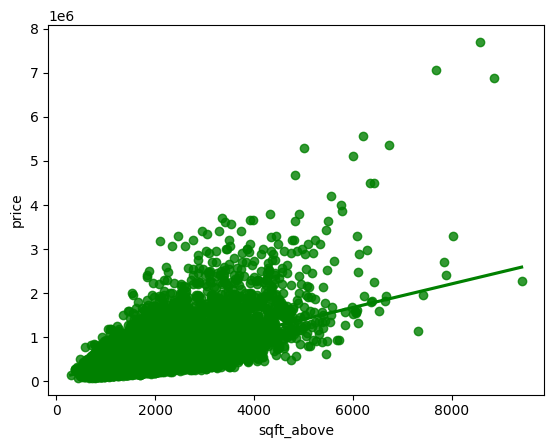

In [72]:
'''
Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
'''
sns.regplot(x="sqft_above",y="price",data=data,color='green',ci=None)
sns.regplot


In [73]:
#-------------------------
#Print Correlations
#-------------------------

print(data.select_dtypes(include='number').corr()['price'].sort_values())


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


In [75]:
'''
Model Development
Define & Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
'''

print(f"data.columns:\n{data.columns}")

X = data[['long']]
Y = data['price']

lm = LinearRegression()

lm.fit(X,Y)

lm.score(X,Y)


data.columns:
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


0.00046769430149007363

In [76]:
'''
Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.
'''

X1 = data[['sqft_living']]
Y1 = data['price']
lm = LinearRegression()
lm
lm.fit(X1,Y1)
lm.score(X1, Y1)

0.4928532179037931

In [79]:
'''
Question 7
Fit a linear regression model to predict the 'price' using the list of features:
'''

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]



In [80]:
X2=data[features]
Y2=data['price']
lm.fit(X2,Y2)
lm.score(X2,Y2)

0.65769516660375

In [83]:
'''
Question 8 - create a pipeline object to predict the ‘price’,
fit the object using the features in the list features, and calculate the R^2.
'''

#----------------------------
# Define Input for Pipeline
#----------------------------

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]



In [85]:

#-------------------------
# Create Pipeline
#-------------------------

pipe=Pipeline(Input)
pipe
X = data[features]
Y = data['price']
pipe.fit(X,Y)

pipe.score(X,Y)


0.7513408515988734

In [87]:
'''
Model Evaluation and Refinement
Create train-test split / Data-Set
'''

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = data[features]
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples: 3242
number of training samples: 18371


In [88]:
'''
Question 9 - Create and fit a Ridge regression object using the training data,
set the regularization parameter to 0.1, and calculate the R² using the test data.
'''

from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_train,y_train)


0.6594378534950243

In [90]:
'''
Question 10 - Second order polynomial transform on both the training data and testing data.
Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1,
and calculate the R² utilising the test data provided. Take a screenshot of your code and the R².
'''

pr = PolynomialFeatures(degree = 2)

x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel1 = Ridge(alpha = 0.1)

RidgeModel1.fit(x_train_pr, y_train)

RidgeModel1.score(x_test_pr, y_test)


0.7002744273539743